# install itchat

In [ ]:
!pip install itchat

In [2]:
import itchat
import pandas as pd

# login

In [3]:

itchat.auto_login()



Getting uuid of QR code.
Please scan the QR code to log in.
Please press confirm on your phone.
Loading the contact, this may take a little while.
Login successfully as 名字不见了



# 查看朋友信息

In [34]:
itchat.search_friends()

IndexError: list index out of range

In [34]:
for indexs in df.index:
    for  i in range(len(df.loc[indexs].values)):
        if(df.loc[indexs].values[i] =='名字不见了'):
            print(indexs,i)
            print(df.loc[indexs].values[i]) 


0 15
名字不见了
not found


In [5]:
friends=itchat.get_friends(update=True)[:]
df=pd.DataFrame(friends)
def Nick2user(name,df=df):
    return df[df['NickName']==name]['UserName'].tolist()[0]

In [11]:
Nick2user('🌸韩悄悄')

'@66128316435cc9bcea1b2a273d09ab62'

In [83]:
pf_friends=pd.DataFrame(friends)

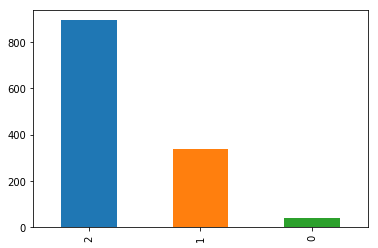

In [84]:
%matplotlib inline
pf_friends['Sex'].value_counts().plot('bar')

# 微信消息发送

In [18]:
#给xx发送message
import datetime

# Nickname='🌸韩悄悄'
Nickname='名字不见了'
for i in range(2):
    itchat.send('[pretty {} ]'.format(i), toUserName=Nick2user(Nickname))   
itchat.send('[robot test ending {}]'.format(str(datetime.datetime.now())), toUserName=Nick2user(Nickname))   

<ItchatReturnValue: {'BaseResponse': {'Ret': 0, 'ErrMsg': '请求成功', 'RawMsg': '请求成功'}, 'MsgID': '7573334214754861330', 'LocalID': '15400034236731'}>

In [11]:
#自动回复msg
@itchat.msg_register(itchat.content.TEXT)
def print_content(msg):
    return msg['Text']+'[robot testing...]'
itchat.run()

Start auto replying.
Bye~


In [14]:
#turing robot
{'apikey':'c43b4ce26e0e451ab907991d8e8b5a34'}

{'apikey': 'c43b4ce26e0e451ab907991d8e8b5a34'}

In [33]:
import requests

apiUrl = 'http://www.tuling123.com/openapi/api/v2'
data = {
	"reqType":0,
    "perception": {
        "inputText": {
            "text": 'dd'
        }
    },
    "userInfo": {
        "apiKey": "c43b4ce26e0e451ab907991d8e8b5a34",
        "userId": "111"
    }
}
# 我们通过如下命令发送一个post请求
r = requests.post(apiUrl, data=data).json()

# 让我们打印一下返回的值，看一下我们拿到了什么
print(r)

{'intent': {'code': 4000}, 'results': [{'groupType': 0, 'resultType': 'text', 'values': {'text': '请求参数缺失或格式错误!'}}]}


In [43]:
@itchat.msg_register(ATTACHMENT)
def download_files(msg):
    msg['Text'](msg['FileName'])

NameError: name 'ATTACHMENT' is not defined

# 检测拉黑

In [26]:
?itchat.add_member_into_chatroom

In [27]:
?itchat.get_friends

In [21]:
hatroomUserName = '@1234567'
friend = itchat.get_friends()[1]
 
r = itchat.add_member_into_chatroom(chatroomUserName, [friend])
if r['BaseResponse']['ErrMsg'] == '':
    status = r['MemberList'][0]['MemberStatus']
    itchat.delete_member_from_chatroom(chatroom['UserName'], [friend])
    return { 3: u'该好友已经将你加入黑名单。',
        4: u'该好友已经将你删除。', }.get(status,
        u'该好友仍旧与你是好友关系。')

IndexError: list index out of range